# PROJECT DESCRIPTION


**OBJECTIVE**: Prediction of Gas Turbine CO and NOx Emission 

**Description**: Predict the Gas Turbine CO and NOx Emission using 11 sensor measures aggregated over one hour (by means of average orsum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions,namely CO and NOx (NO + NO2)

**Motivation**: Harmful effect of Flue gas emitted from power plant turbines on environment has always been a substantial concern. In the recent past years many peaceful protest to save environment has been seen. Environmental organization that seeks to protect, analyse or monitor the environment have conducted many events and activities to raise people awareness on environment.
This project aims to predict emission of flue gases based on sensor data from gas turbine and various Machine Learning techniques. 

The ML model can be used to predict/estimate amount of emission for future operations of Turbine and Turbine of same homologus series. Model output can also be used for validation and backing up of costly continuous emission monitoring systems used in gas-turbine-based power plants. Their implementation relies on the availability of appropriate and ecologically valid data.

**Data Source**: https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set#

**Data Description:** The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2).

 **Variable (Abbr.)  &  Unit**

Ambient temperature (AT) C 

Ambient pressure (AP) mbar 

Ambient humidity (AH) (%) 

Air filter difference pressure (AFDP) mbar

Gas turbine exhaust pressure (GTEP) mbar 

Turbine inlet temperature (TIT) C 

Turbine after temperature (TAT) C 

Compressor discharge pressure (CDP) mbar 

Turbine energy yield (TEY) MWH 

Carbon monoxide (CO) mg/m^3

 Nitrogen oxides (NOx) mg/m^3

# Library Import

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
from sklearn.utils import shuffle


from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split as tts
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

# Loading file

In [2]:
# path of each file
path = ("dataFolder/CO_NOX.csv")

df = pd.read_csv(path)
print(df.shape)
df.head()

(36674, 11)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,23.056,1019.3,62.777,4.2547,30.505,1100.0,542.30,150.94,13.379,1.6653,49.305
1,25.551,1010.5,81.232,4.4498,29.848,1099.6,545.38,146.08,13.117,1.0618,55.238
2,18.250,1017.9,81.401,3.9130,21.331,1043.6,539.33,113.22,11.017,12.6590,71.888
3,19.743,1016.0,82.356,3.7566,24.196,1078.6,549.94,130.07,11.891,2.0195,52.263
4,26.957,1010.2,65.205,5.3760,30.726,1099.9,544.02,148.01,13.272,1.0975,55.536


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36674 entries, 0 to 36673
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36674 non-null  float64
 1   AP      36674 non-null  float64
 2   AH      36674 non-null  float64
 3   AFDP    36674 non-null  float64
 4   GTEP    36674 non-null  float64
 5   TIT     36674 non-null  float64
 6   TAT     36674 non-null  float64
 7   TEY     36674 non-null  float64
 8   CDP     36674 non-null  float64
 9   CO      36674 non-null  float64
 10  NOX     36674 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


None

In [4]:
# Splitting into train, CV and test

X = df.iloc[:,0:-2]
y = df.loc[:,['CO','NOX']]
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=4576)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train,X_CV, y_train, y_CV = tts(X_train,y_train,test_size=0.25,random_state=4576)

X_train.reset_index(drop=True, inplace=True)
X_CV.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_CV.reset_index(drop=True, inplace=True)

In [5]:
print(X_train.shape,X_CV.shape, X_test.shape)

(22004, 9) (7335, 9) (7335, 9)


# Statistical Analysis

In [6]:
display(X_train.describe())
display(X_CV.describe())

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
count,22004.000000,22004.000000,22004.000000,22004.000000,22004.000000,22004.000000,22004.000000,22004.000000,22004.000000
mean,17.719033,1013.059016,77.816560,3.924004,25.567068,1081.508426,546.205487,133.524341,12.060695
std,7.438207,6.459662,14.479811,0.769170,4.186041,17.409604,6.795944,15.571358,1.085949
min,-5.979300,985.850000,24.085000,2.105700,17.738000,1001.300000,512.600000,100.020000,9.851800
25%,11.813750,1008.800000,68.160500,3.357675,23.134500,1071.900000,544.900000,124.610000,11.438750
50%,17.790000,1012.600000,80.351500,3.936700,25.112000,1085.900000,549.880000,133.740000,11.967000
75%,23.661750,1017.000000,89.313250,4.374300,29.068000,1096.900000,550.040000,143.922500,12.836750
max,37.103000,1036.500000,100.200000,7.610600,40.716000,1100.800000,550.610000,178.310000,15.083000


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
count,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000
mean,17.784079,1013.008474,78.054991,3.936140,25.639591,1081.688180,546.061085,133.745644,12.078589
std,7.392093,6.401317,14.345855,0.778456,4.216355,17.392485,6.914673,15.670243,1.094620
min,-5.771100,987.310000,29.434000,2.099200,17.857000,1000.800000,512.450000,100.520000,9.946600
25%,11.806000,1008.800000,68.184500,3.364650,23.188000,1072.400000,544.290000,124.955000,11.472000
50%,17.932000,1012.500000,80.686000,3.939700,25.144000,1086.000000,549.880000,133.740000,11.968000
75%,23.673000,1016.800000,89.669000,4.388250,29.328000,1098.700000,550.050000,145.140000,12.975500
max,34.598000,1036.600000,100.200000,7.554900,39.370000,1100.600000,550.590000,177.910000,15.043000


In [116]:
display(y_train.describe())
display(y_CV.describe())

,CO,NOX
count,22004.000000,22004.000000
mean,2.346273,65.301036
std,2.124820,11.598751
min,0.000388,25.905000
25%,1.179175,57.233750
50%,1.707900,63.886000
75%,2.843050,71.549500
max,44.103000,119.900000


,CO,NOX
count,7335.000000,7335.000000
mean,2.303673,65.010036
std,2.045379,11.432212
min,0.003665,38.172000
25%,1.168450,56.912000
50%,1.709000,63.677000
75%,2.768150,71.216000
max,43.397000,119.890000


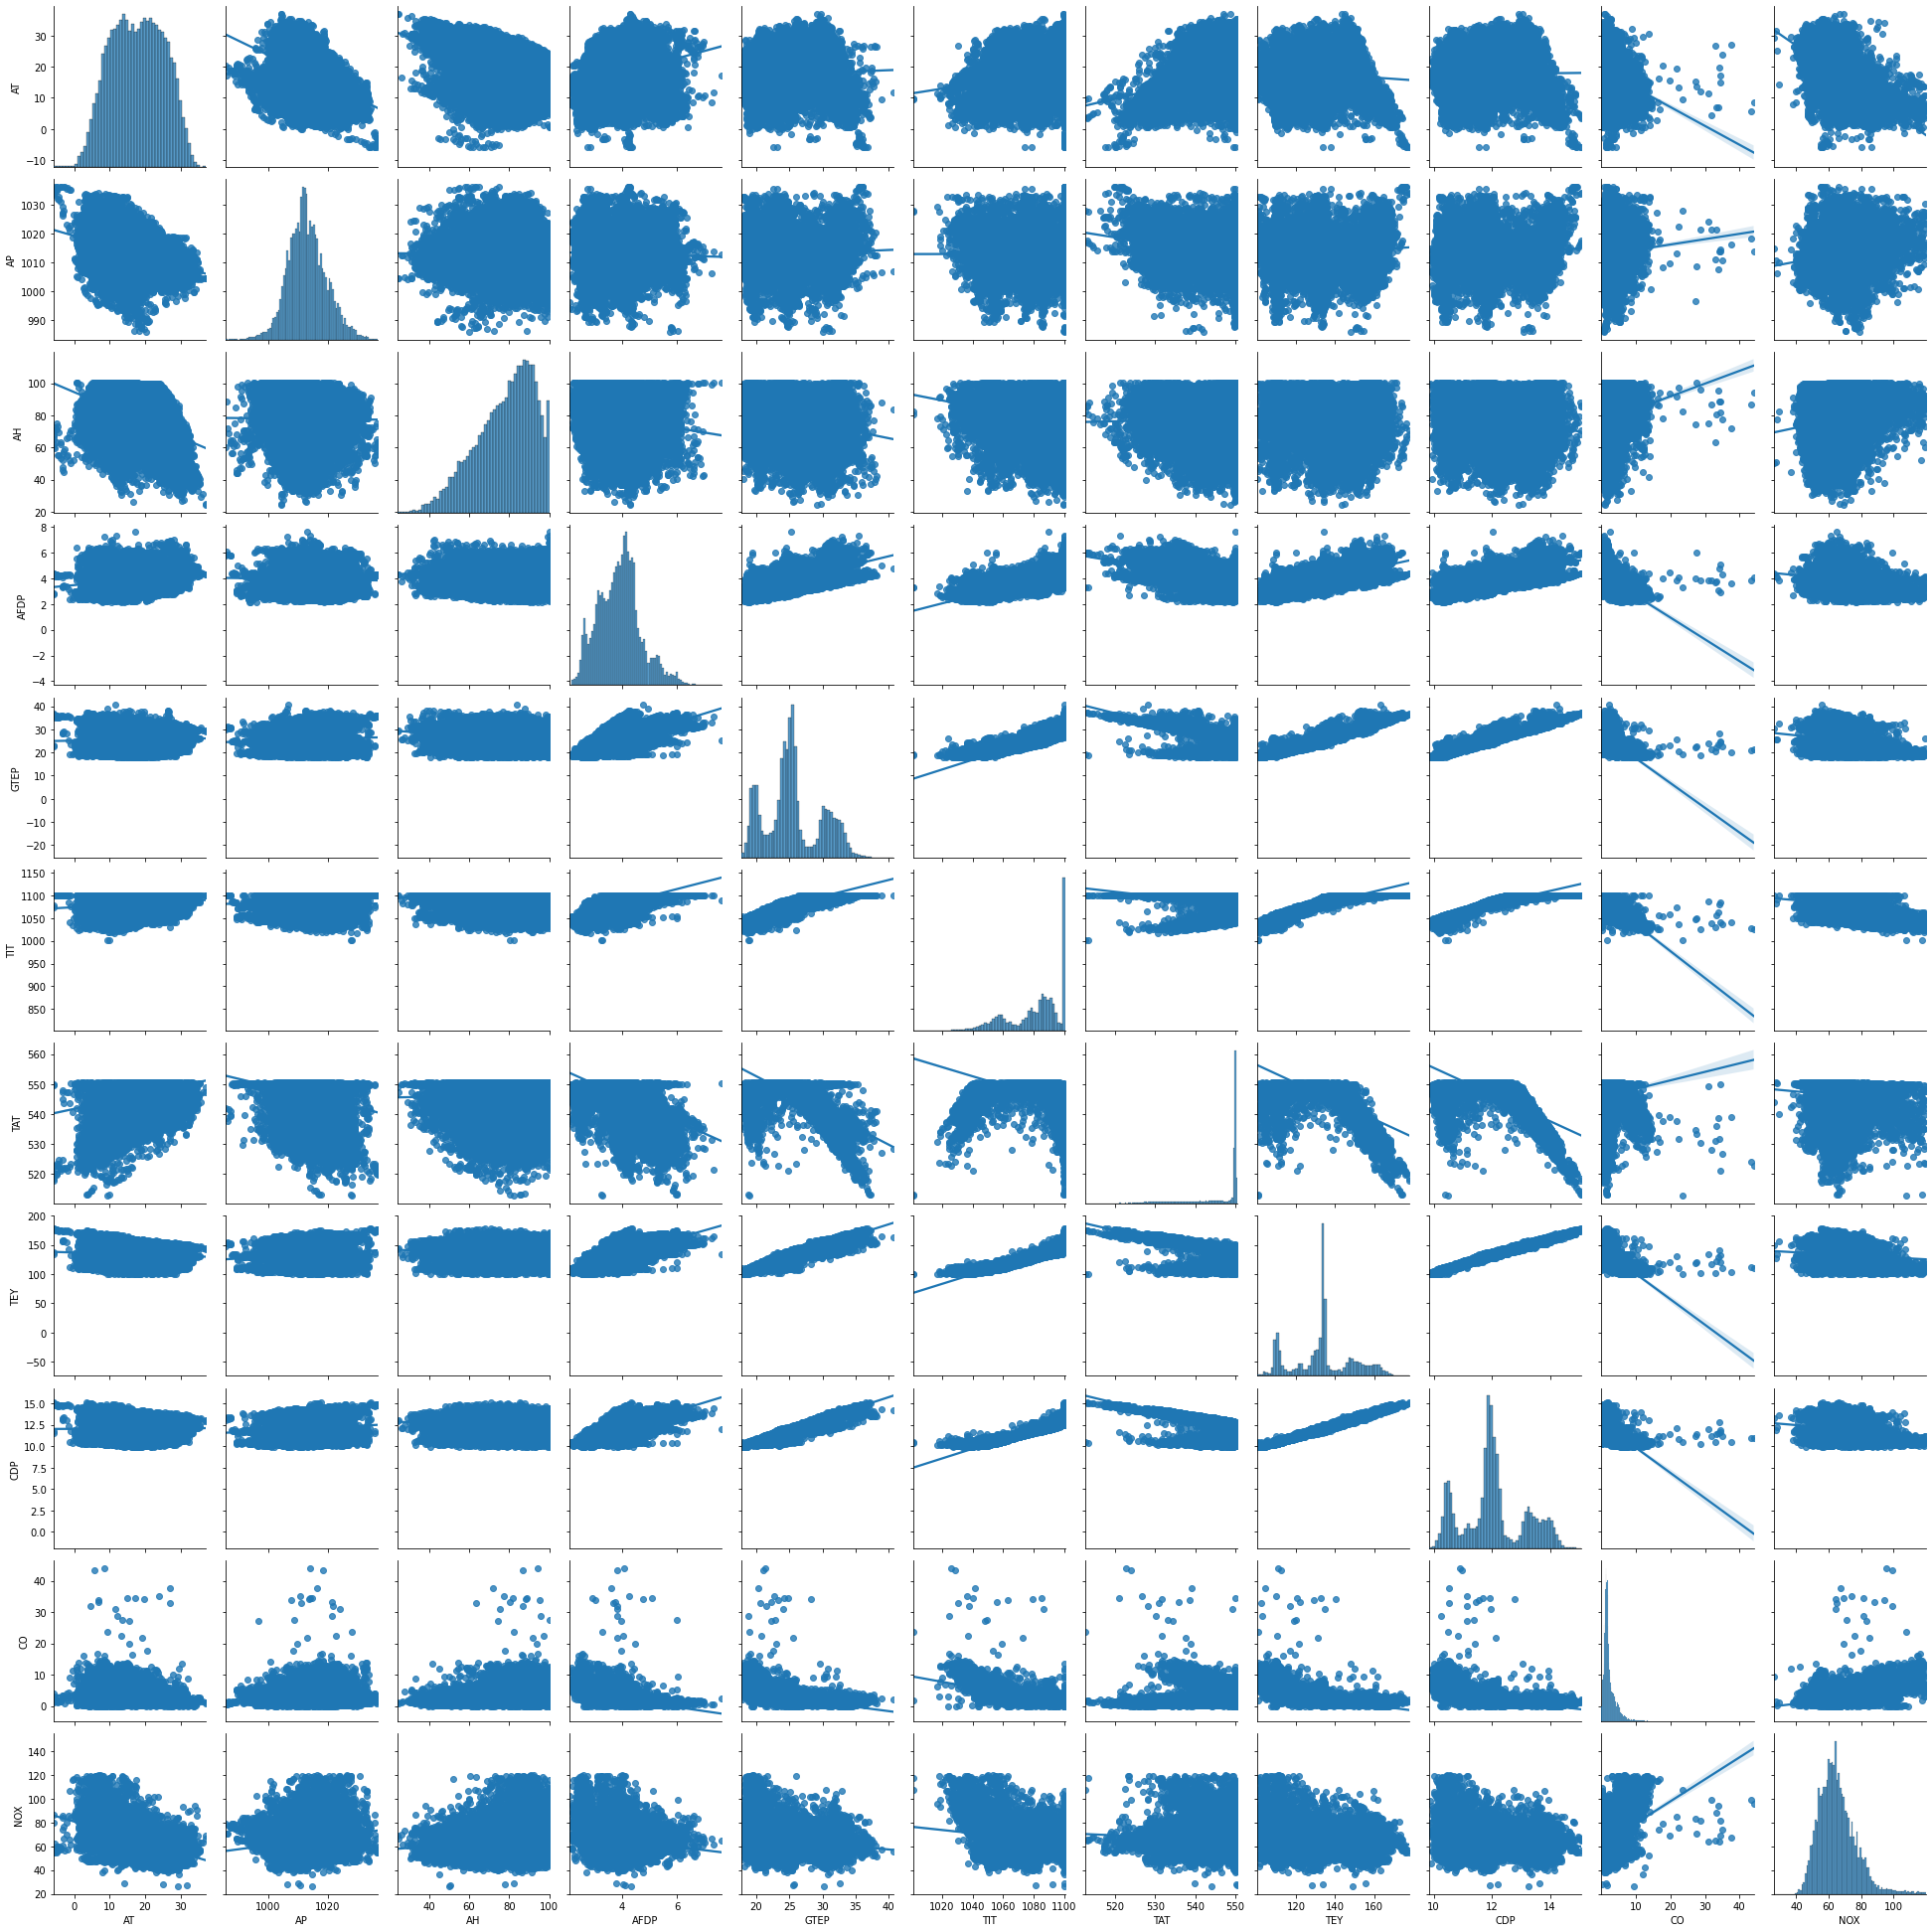

In [8]:
sns.pairplot(data = pd.concat([X_train,y_train],axis=1),kind='reg')

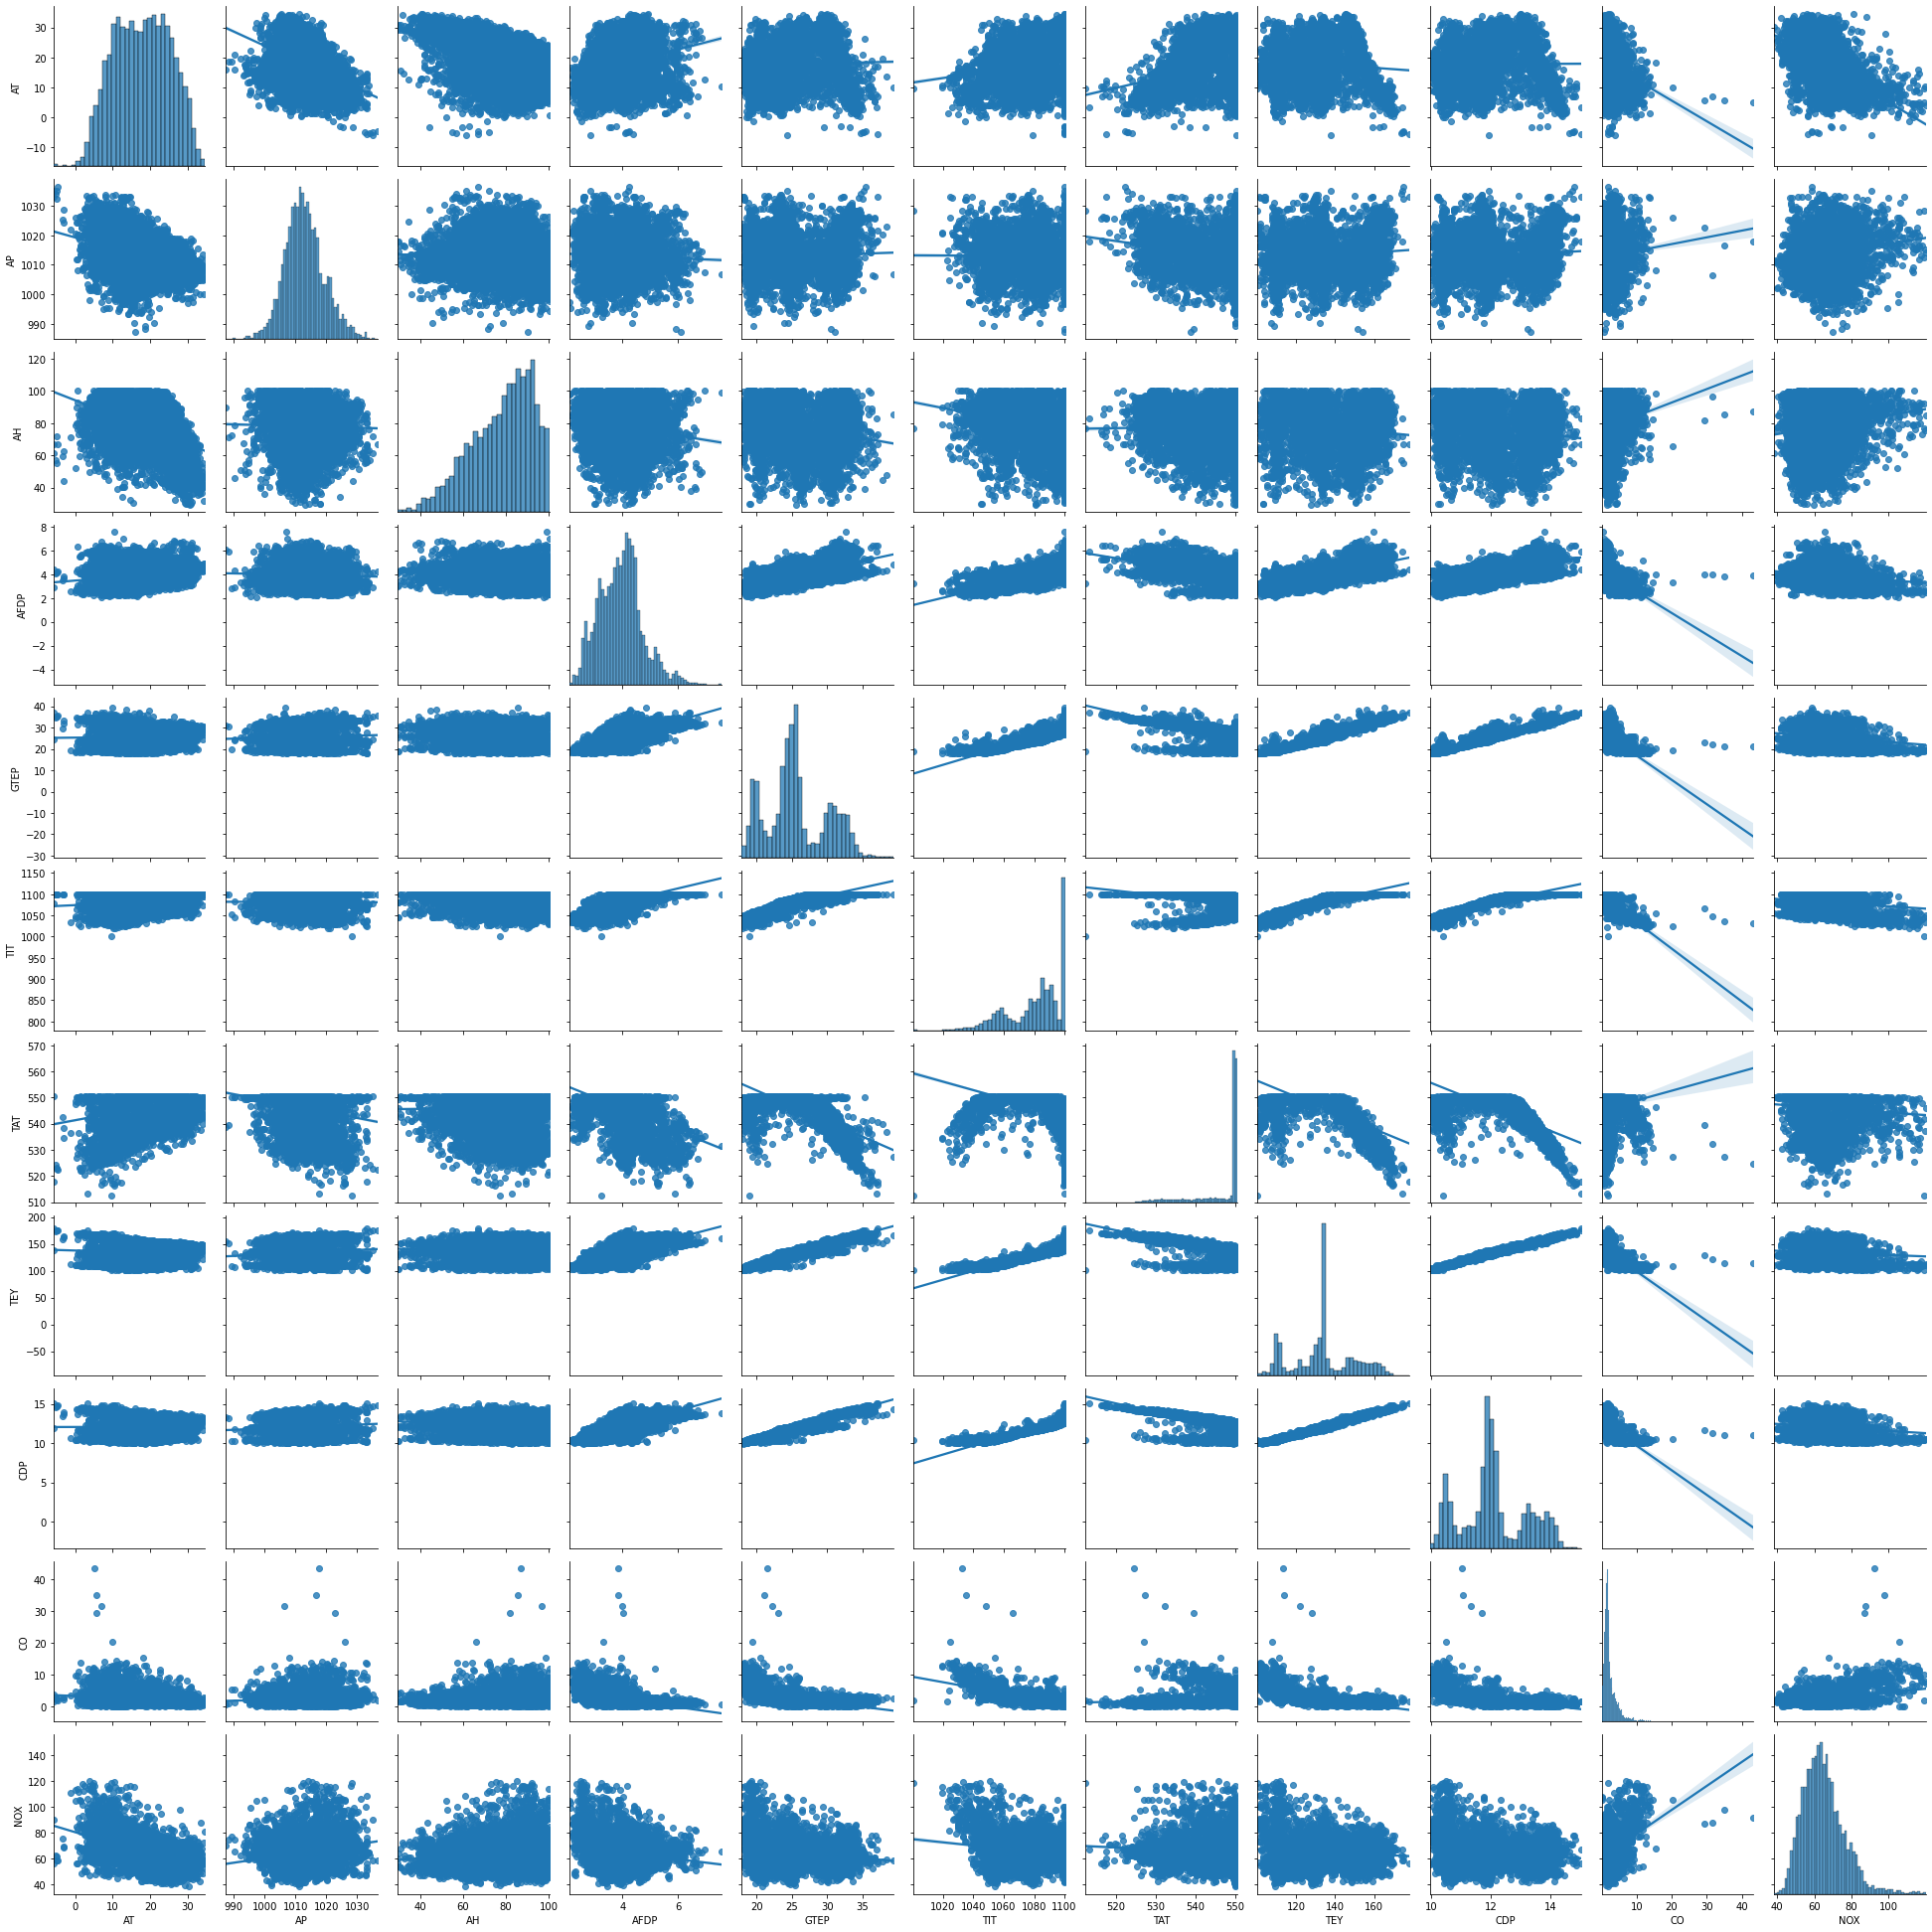

In [9]:
sns.pairplot(data = pd.concat([X_CV,y_CV],axis=1),kind='reg')

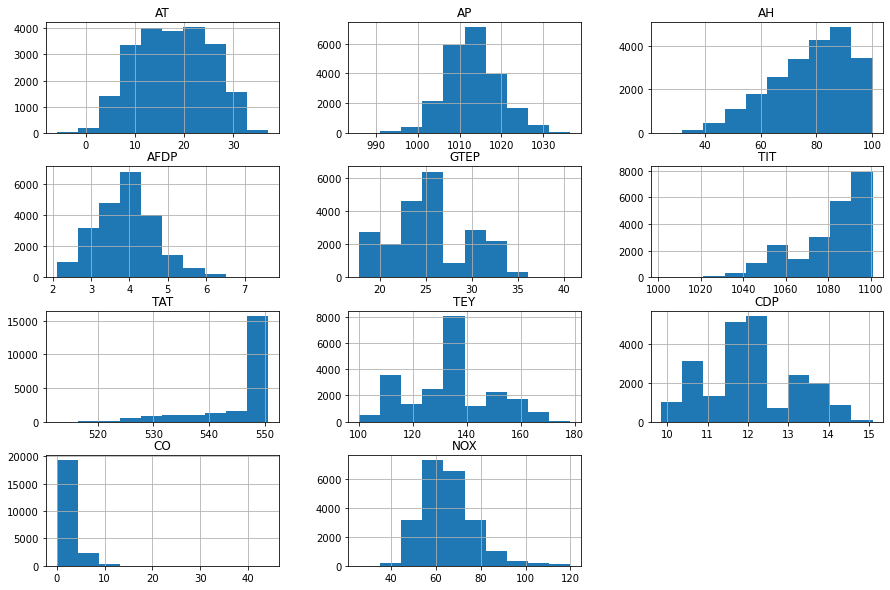

In [10]:
pd.concat([X_train,y_train],axis=1).hist(figsize=(15,10))
plt.show()

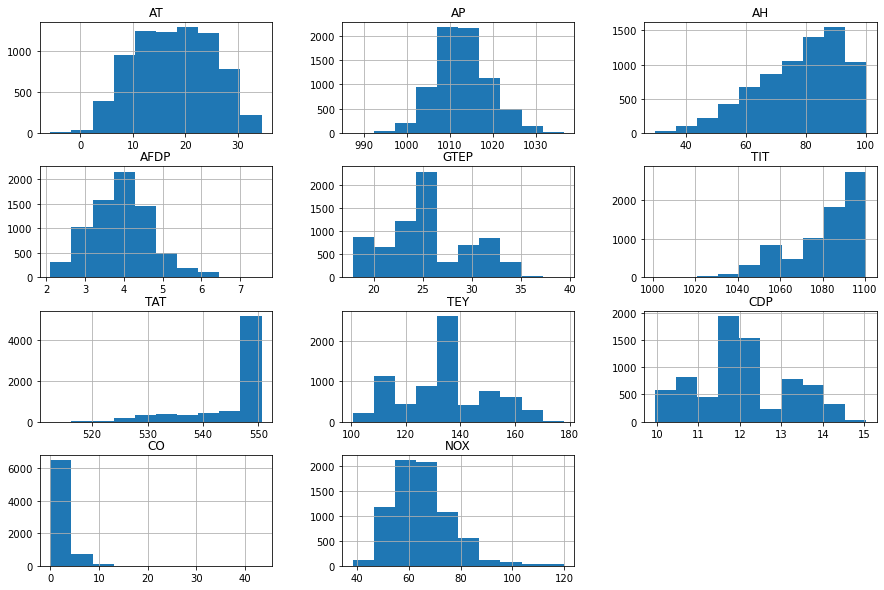

In [11]:
pd.concat([X_CV,y_CV],axis=1).hist(figsize=(15,10))
plt.show()

# Modelling

## CO PREDICTION

### Feature and Target Variable split data

In [7]:
X_train_CO = X_train.loc[:,['AT',  'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']].copy()
X_CV_CO = X_CV.loc[:,['AT', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']].copy()

y_train_CO = y_train.loc[:,['CO']].copy()
y_CV_CO = y_CV.loc[:,['CO']].copy()

### Checking Multicolinearity

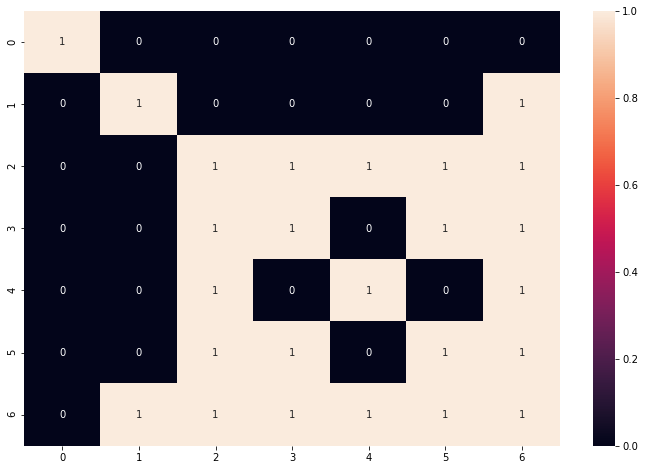

In [8]:
plt.figure(figsize=(12,8))
corr_mat = np.corrcoef(X_train_CO,rowvar=False)
sns.heatmap(abs(corr_mat)>0.7,annot=True)
plt.show()

### Using PCA to remove multicollinearity

[553.14232164  81.29780583  28.37159263   2.7447201 ]
(22004, 4)


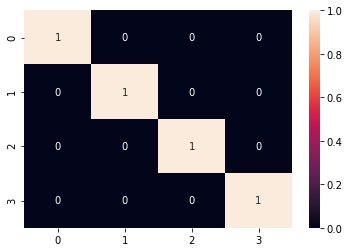

In [9]:
n = 4
decom = PCA(n_components=n,svd_solver='full')
decom.fit(X_train_CO)
X_train_CO_t = decom.transform(X_train_CO)
X_train_CO = pd.DataFrame(X_train_CO_t, columns=[f'V{i}' for i in range(n)])
print(decom.explained_variance_)
sns.heatmap(np.corrcoef(X_train_CO, rowvar=False)>0.1,annot=True)
print(X_train_CO.shape)


X_CV_CO_t = decom.transform(X_CV_CO)
X_CV_CO = pd.DataFrame(X_CV_CO_t, columns=[f'V{i}' for i in range(n)])

**Lets look into the Linear combination we got using PCA**

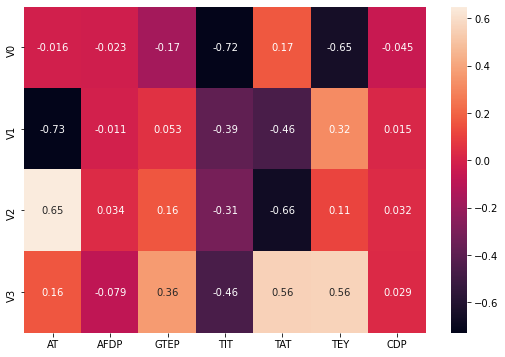

In [10]:
components = decom.components_
linear_df = pd.DataFrame(components,
                         columns=['AT',  'AFDP', 'GTEP',
                                  'TIT', 'TAT', 'TEY', 'CDP'],
                         index=X_train_CO.columns)

plt.figure(figsize=(9,6))
sns.heatmap(linear_df, annot=True)
plt.show()

### Linear Regression

In [11]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_CO,y_train_CO)

yhat = lr.predict(X_train_CO)  # prediction on train data
yhat_CV = lr.predict(X_CV_CO) # prediction on CV data

mse = mean_squared_error(yhat, y_train_CO)  # MSE train
mse_CV = mean_squared_error(yhat_CV, y_CV_CO)  # MSE CV

R_tr = r2_score(y_train_CO,yhat)  # train R_square
R_CV = r2_score(y_CV_CO, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(y_train_CO)-1))/(len(y_train_CO)-X_train_CO.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(y_CV_CO)-1))/(len(y_CV_CO)-X_train_CO.shape[1]-1)  # CV A_djustedR_square

print("MSE train    : ",mse,"\tMSE CV      : ", mse_CV)
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)


lr.coef_

MSE train    :  1.9509848229513358 	MSE CV      :  1.761946250001736
R_square train:  0.5678550812961055 	R_square CV  :  0.5787847253373972
Adjusted_R_square train:  0.5677765059210969 	Adjusted_R_square CV  :  0.578554867070187


array([[ 0.05982794,  0.0652601 ,  0.09125892, -0.02222886]])

### Feature Engineering

Polynomial Feature transformation

In [12]:
# Polynomial features transformation
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(X_train_CO)
X_train_CO = poly.transform(X_train_CO)
X_train_CO = pd.DataFrame(data=X_train_CO, columns=[f'V{i}' for i in range(X_train_CO.shape[1])])

poly2 = PolynomialFeatures(degree=deg)
poly2.fit(X_CV_CO)
X_CV_CO = poly2.transform(X_CV_CO)
X_CV_CO = pd.DataFrame(data=X_CV_CO, columns=[f'V{i}' for i in range(X_CV_CO.shape[1])])

X_train_CO.shape, X_CV_CO.shape

((22004, 15), (7335, 15))

**Lets see how feature has been combined**

In [13]:
pd.DataFrame(poly.powers_, 
             index=[f'V{i}' for i in range(X_CV_CO.shape[1])],
             columns=['Old_V0','Old_V1','Old_V2','Old_V3'])

,Old_V0,Old_V1,Old_V2,Old_V3
V0,0,0,0,0
V1,1,0,0,0
V2,0,1,0,0
V3,0,0,1,0
V4,0,0,0,1
V5,2,0,0,0
V6,1,1,0,0
V7,1,0,1,0
V8,1,0,0,1
V9,0,2,0,0


In [14]:
scaler = StandardScaler()
scaler.fit(X_train_CO)
X_train_CO = scaler.transform(X_train_CO)
X_train_CO = pd.DataFrame(data = X_train_CO, columns=[f'V{i}' for i in range(X_train_CO.shape[1])])


X_CV_CO = scaler.transform(X_CV_CO)
X_CV_CO = pd.DataFrame(data = X_CV_CO, columns=[f'V{i}' for i in range(X_CV_CO.shape[1])])

### Linear Regression

In [15]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_CO,y_train_CO)

yhat = lr.predict(X_train_CO)  # prediction on train data
yhat_CV = lr.predict(X_CV_CO) # prediction on CV data

mse = mean_squared_error(yhat, y_train_CO)  # MSE train
mse_CV = mean_squared_error(yhat_CV, y_CV_CO)  # MSE CV

R_tr = r2_score(y_train_CO,yhat)  # train R_square
R_CV = r2_score(y_CV_CO, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(y_train_CO)-1))/(len(y_train_CO)-X_train_CO.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(y_CV_CO)-1))/(len(y_CV_CO)-X_train_CO.shape[1]-1)  # CV A_djustedR_square

print("MSE train    : ",mse,"\tMSE CV      : ", mse_CV)
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)


lr.coef_

MSE train    :  1.4986597159126367 	MSE CV      :  1.361521115665885
R_square train:  0.6680455052858081 	R_square CV  :  0.6745113588490148
Adjusted_R_square train:  0.6678190491542493 	Adjusted_R_square CV  :  0.6738442827980153


array([[ 0.        ,  0.91150363,  0.68647439,  0.37522711, -0.05303293,
         0.07145218,  0.56338778,  0.28962035, -0.28514915,  0.10022154,
        -0.00992605, -0.03527947, -0.03594209, -0.08318366, -0.01731754]])

### Ridge Regression


In [19]:
# Ridge Regression
mse_tr_list = []
mse_CV_list = []

R_tr_list = []
R_CV_list = []
A_R_tr_list = []
A_R_CV_list = []

for alpha in range(0,10):
    lr = Ridge(alpha=alpha, fit_intercept=True,max_iter=None, solver='auto')
    lr.fit(X_train_CO,y_train_CO)

    yhat = lr.predict(X_train_CO)  # prediction on train data
    yhat_CV = lr.predict(X_CV_CO) # prediction on CV data

    mse = mean_squared_error(yhat, y_train_CO)  # MSE train
    mse_tr_list.append(mse)

    mse_CV = mean_squared_error(yhat_CV, y_CV_CO)  # MSE CV
    mse_CV_list.append(mse_CV)


    R_tr = lr.score(X_train_CO,y_train_CO)  # train R_square
    R_tr_list.append(R_tr)

    R_CV = lr.score(X_CV_CO,y_CV_CO)  # CV R_square
    R_CV_list.append(R_CV)

    # Adjusted R_squared

    A_R_tr = 1- ((1-R_tr)*(len(y_train_CO)-1))/(len(y_train_CO)-X_train_CO.shape[1]-1)  # train Adjusted_R_square
    A_R_CV = 1- ((1-R_CV)*(len(y_CV_CO)-1))/(len(y_CV_CO)-X_train_CO.shape[1]-1)  # CV A_djustedR_square
    A_R_tr_list.append(A_R_tr)
    A_R_CV_list.append(A_R_CV)


print("MSE_tr",mse_tr_list.index(min(mse_tr_list)), min(mse_tr_list))
print("MSE_CV",mse_CV_list.index(min(mse_CV_list)), min(mse_CV_list))
print("R_train",R_tr_list.index(max(R_tr_list)), max(R_tr_list))
print("R_CV",R_CV_list.index(max(R_CV_list)), max(R_CV_list))
print("Adjusted R_train",A_R_tr_list.index(max(A_R_tr_list)), max(A_R_tr_list))
print("Adjusted_R_CV",A_R_CV_list.index(max(A_R_CV_list)), max(A_R_CV_list))


MSE_tr 0 1.4986597159126367
MSE_CV 0 1.3615211156658855
R_train 0 0.6680455052858081
R_CV 0 0.6745113588490146
Adjusted R_train 0 0.6678190491542493
Adjusted_R_CV 0 0.6738442827980151


### Decision Tree

In [20]:
mse_tr_list = []
mse_cv_list = []
# Decision Tree regression model
for depth in range(1,15):
    dtr = DecisionTreeRegressor(max_depth=depth, criterion='mse', random_state=1268)
    dtr.fit(X_train_CO,y_train_CO)

    mse = mean_squared_error(y_train_CO,dtr.predict(X_train_CO))
    mse_tr_list.append(mse)
    mse_CV = mean_squared_error(y_CV_CO,dtr.predict(X_CV_CO))
    mse_cv_list.append(mse_CV)

    print("Depth: ",depth,"MSE train    : ",mse,"\tMSE CV      : ", mse_CV)

Depth:  1 MSE train    :  2.587658692957792 	MSE CV      :  2.349487762279689
Depth:  2 MSE train    :  1.8131268488535772 	MSE CV      :  1.6117115489103375
Depth:  3 MSE train    :  1.4619348144675735 	MSE CV      :  1.4632849822100857
Depth:  4 MSE train    :  1.2815803466556845 	MSE CV      :  1.4406645812597705
Depth:  5 MSE train    :  1.1061829799824543 	MSE CV      :  1.5006958281474918
Depth:  6 MSE train    :  1.0109876046961808 	MSE CV      :  1.4387441537166588
Depth:  7 MSE train    :  0.9365534559330041 	MSE CV      :  1.4278684109549054
Depth:  8 MSE train    :  0.8638634288241324 	MSE CV      :  1.5159279272060957
Depth:  9 MSE train    :  0.7920898484809913 	MSE CV      :  1.3713185812490312
Depth:  10 MSE train    :  0.7239818401541107 	MSE CV      :  1.4650530443279692
Depth:  11 MSE train    :  0.6107412974420802 	MSE CV      :  1.4133813448395909
Depth:  12 MSE train    :  0.5434190491804667 	MSE CV      :  1.6348528317867044
Depth:  13 MSE train    :  0.4813518607

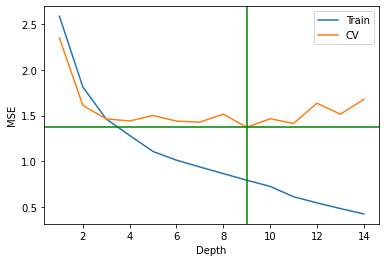

In [21]:
x_axis = list(range(1,15))
plt.plot(x_axis,mse_tr_list)
plt.plot(x_axis,mse_cv_list)
xh = mse_cv_list.index(min(mse_cv_list))
plt.axvline(x=xh+1, color='g')
plt.axhline(y=mse_cv_list[xh], color='g')
plt.xlabel("Depth")
plt.ylabel('MSE')
plt.legend(['Train','CV'])
plt.show()


### Random Forest

In [22]:
# Random forest
mse_tr_list = []
mse_cv_list = []
for f in range(1,16):
    rfReg = RandomForestRegressor(max_depth=9, n_estimators=100, n_jobs=-1, 
                                  criterion='mse', warm_start=True, 
                                  oob_score=True, bootstrap=True,
                                  max_features=f, random_state=1268)
    
    rfReg.fit(X_train_CO,y_train_CO.loc[:,'CO'])

    yhat_tr = rfReg.predict(X_train_CO)
    yhat_cv = rfReg.predict(X_CV_CO)

    mse = mean_squared_error(y_train_CO,yhat_tr)
    mse_tr_list.append(mse)

    mse_CV = mean_squared_error(y_CV_CO,yhat_cv)
    mse_cv_list.append(mse_CV)

    print("max feature: ",f,"MSE train    : ",mse,"\tMSE CV      : ", mse_CV)


max feature:  1 MSE train    :  0.9618575959150947 	MSE CV      :  1.102898178049298
max feature:  2 MSE train    :  0.8696875797520992 	MSE CV      :  1.0226869725804668
max feature:  3 MSE train    :  0.8273213957632733 	MSE CV      :  0.9887480422160797
max feature:  4 MSE train    :  0.8054124190417822 	MSE CV      :  0.9861185175761716
max feature:  5 MSE train    :  0.7889343411113643 	MSE CV      :  0.9963076387475401
max feature:  6 MSE train    :  0.7849516868820166 	MSE CV      :  0.997472133743469
max feature:  7 MSE train    :  0.7769815439616741 	MSE CV      :  0.9680655584636426
max feature:  8 MSE train    :  0.7814155633685482 	MSE CV      :  0.9911370754384252
max feature:  9 MSE train    :  0.7669838661330819 	MSE CV      :  0.9958741926106661
max feature:  10 MSE train    :  0.7626411655279354 	MSE CV      :  1.0051578344922274
max feature:  11 MSE train    :  0.7589811138292132 	MSE CV      :  1.0000229054606358
max feature:  12 MSE train    :  0.7598661777420012 	M

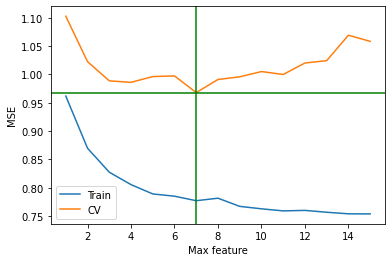

In [23]:
x_axis = list(range(1,16))
plt.plot(x_axis,mse_tr_list)
plt.plot(x_axis,mse_cv_list)
xh = mse_cv_list.index(min(mse_cv_list))
plt.axvline(x=xh+1, color='g')
plt.axhline(y=mse_cv_list[xh], color='g')
plt.xlabel("Max feature")
plt.ylabel('MSE')
plt.legend(['Train','CV'])
plt.show()


### Support Vector

In [24]:
svRegr = SVR(C=1,epsilon=0.1,kernel='rbf')
svRegr.fit(X_train_CO,y_train_CO.loc[:,'CO'])

yhat_tr = svRegr.predict(X_train_CO)
yhat_cv = svRegr.predict(X_CV_CO)

mse = mean_squared_error(y_train_CO,yhat_tr)
mse_CV = mean_squared_error(y_CV_CO,yhat_cv)

print("MSE train    : ",mse,"\tMSE CV      : ", mse_CV)


MSE train    :  1.4811809849589164 	MSE CV      :  1.3545020006050474


### MODEL  $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $  MSE

Linear Regression: $ \ \ \ \ \ \ \$ 1.361

Decision Tree: $ \ \ \ \ \ \ \ \ \ \ \ \ \$ 1.371

Random Forest: $ \ \ \ \ \ \ \ \ \ \$ 0.968

SVR Regressor: $ \ \ \ \ \ \ \ \ \ \ $ 1.354

In [25]:
meanPred = ((y_CV_CO - y_CV_CO.mean())**2).sum()
meanPred

CO    30682.352994
dtype: float64

### HYPERPARAMETER OPTIMIZATION
We will use Hyper Opt to find best parameter for Decision Tree, Random Forest and SVR Regressor 

In [26]:
from hyperopt import tpe, hp, fmin, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score

In [84]:
X_tr_cv_CO = pd.concat([X_train_CO,X_CV_CO])
X_tr_cv_CO.reset_index(drop=True,inplace=True)

y_tr_cv_CO = pd.concat([y_train_CO,y_CV_CO])
y_tr_cv_CO.reset_index(drop=True,inplace=True)

X_tr_cv_CO.shape, y_tr_cv_CO.shape

((29339, 15), (29339, 1))

In [28]:
def hyperopt_obj_function(model, params):
    mod = model(**params)
    out = cross_val_score(mod, X_tr_cv_CO,y_tr_cv_CO.loc[:,'CO'], 
                          cv=4, scoring='neg_mean_squared_error',n_jobs=-1).mean()
    return out

In [29]:
def surrogate_function(arg):
    params = arg['rparams']
    model = arg['model']
    perf = hyperopt_obj_function(model,params)
    return {'loss':-perf, 'status':STATUS_OK}

In [30]:
rparams = {"max_depth":scope.int(hp.quniform('max_depth', 10,25,1)),
           "n_estimators":scope.int(hp.quniform('n_estimators', 80,200,1)), 
           'max_features':scope.int(hp.quniform('max_features', 3,15,1)),
           'criterion':hp.choice('criterion',['mse','friedman_mse']), 
           "warm_start":hp.choice('warm_start',["True"]),
           "oob_score":hp.choice("oob_score",["True"]), 
           "bootstrap":hp.choice("bootstrap",["True"]),
           'n_jobs':-1}

In [32]:
trials = Trials()
best = fmin(surrogate_function, space={'model':RandomForestRegressor,
                                       'rparams':rparams},algo=tpe.suggest, 
            max_evals=300, trials=trials)
print('best:')
print (best)

100%|████████████████████████████████████████████| 300/300 [2:50:51<00:00, 34.17s/trial, best loss: 1.1554292890817988]
best:
{'bootstrap': 0, 'criterion': 1, 'max_depth': 16.0, 'max_features': 4.0, 'n_estimators': 161.0, 'oob_score': 0, 'warm_start': 0}


In [49]:
rfReg = RandomForestRegressor(max_depth=16, n_estimators=161, n_jobs=-1, 
                                  criterion='friedman_mse', warm_start=True, 
                                  oob_score=True, bootstrap=True,
                                  max_features=4, random_state=4578)


rfReg.fit(X_tr_cv_CO,y_tr_cv_CO.loc[:,'CO'])

yhat_tr = rfReg.predict(X_tr_cv_CO)

mse = mean_squared_error(y_tr_cv_CO,yhat_tr)
mse

0.3761626597135348

In [43]:
dparams = {"max_depth":scope.int(hp.quniform('max_depth', 5,20,1)),
           'criterion':hp.choice('criterion',['mse','friedman_mse']),
           }

In [45]:
trials = Trials()
best = fmin(surrogate_function, space={'model':DecisionTreeRegressor,
                                       'rparams':dparams},algo=tpe.suggest, 
            max_evals=200, trials=trials)
print('best:')
print (best)

100%|██████████████████████████████████████████████| 200/200 [02:36<00:00,  1.28trial/s, best loss: 1.4241625264600049]
best:
{'criterion': 1, 'max_depth': 8.0}


### We got Random forest with minimum MSE

In [85]:
X_test_CO = X_test.loc[:,['AT',  'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']].copy()
y_test_CO = y_test.loc[:,['CO']].copy()


X_test_CO_t = decom.transform(X_test_CO)
X_test_CO = pd.DataFrame(X_test_CO_t, columns=[f'V{i}' for i in range(X_test_CO_t.shape[1])])


# Polynomial Feature Transform
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(X_test_CO)
X_test_CO = poly.transform(X_test_CO)
X_test_CO = pd.DataFrame(data=X_test_CO, columns=[f'V{i}' for i in range(X_test_CO.shape[1])])


# Scaling
X_test_CO = scaler.transform(X_test_CO)
X_test_CO = pd.DataFrame(data = X_test_CO, columns=[f'V{i}' for i in range(X_test_CO.shape[1])])

In [48]:
dtr = DecisionTreeRegressor(max_depth=8, criterion='friedman_mse',random_state=1268)
dtr.fit(X_tr_cv_CO,y_tr_cv_CO.iloc[:,0])

yhat_tr = dtr.predict(X_tr_cv_CO)
yhat_test = dtr.predict(X_test_CO)

mse = mean_squared_error(y_tr_cv_CO,yhat_tr)
print(mse)

mse_test = mean_squared_error(y_test_CO,yhat_test)
print(mse_test)

0.8555514536135953
1.3870549233489835


In [50]:
rfReg = RandomForestRegressor(max_depth=16, n_estimators=161, n_jobs=-1, 
                                  criterion='friedman_mse', warm_start=True, 
                                  oob_score=True, bootstrap=True,
                                  max_features=4, random_state=4578)


rfReg.fit(X_tr_cv_CO,y_tr_cv_CO.iloc[:,0])

yhat_tr = rfReg.predict(X_tr_cv_CO)
yhat_test = rfReg.predict(X_test_CO)

mse = mean_squared_error(y_tr_cv_CO,yhat_tr)
print(mse)

mse_test = mean_squared_error(y_test_CO,yhat_test)
print(mse_test)

0.3761626597135348
1.1678882611708394


In [51]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_tr_cv_CO,y_tr_cv_CO.iloc[:,0])

yhat_tr = lr.predict(X_tr_cv_CO)
yhat_test = lr.predict(X_test_CO)

mse = mean_squared_error(y_tr_cv_CO,yhat_tr)
print(mse)

mse_test = mean_squared_error(y_test_CO,yhat_test)
print(mse_test)


R_tr = r2_score(y_tr_cv_CO,yhat_tr)  # train R_square
R_test = r2_score(y_test_CO, yhat_test)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(y_tr_cv_CO)-1))/(len(y_tr_cv_CO)-X_tr_cv_CO.shape[1]-1)  # train Adjusted_R_square
A_R_test = 1- ((1-R_CV)*(len(y_test_CO)-1))/(len(y_test_CO)-X_test_CO.shape[1]-1)  # CV A_djustedR_square

print("R_square train: ",R_tr,        "\tR_square CV  : ",R_test)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_test)


lr.coef_

1.4628577241610856
1.5892143521530055
R_square train:  0.6699387558464471 	R_square CV  :  0.6608497168075914
Adjusted_R_square train:  0.6697699150504064 	Adjusted_R_square CV  :  0.6738370314618088


array([ 0.        ,  0.90139972,  0.70677485,  0.36775069, -0.06790997,
        0.07013027,  0.57118054,  0.29912571, -0.27705038,  0.1097409 ,
       -0.02870279, -0.04577361, -0.07739023, -0.07260591, -0.0056225 ])

### Final Training of Random Forest Regressor over all the data

[554.27079665  81.92373734  28.27335722   2.71888551]
(36674, 4)
(36674, 15)


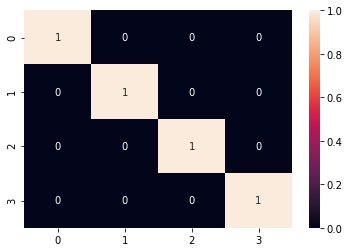

In [46]:
#_______________________________________________________________________________
X_final_CO = X.loc[:,['AT',  'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']].copy()
X_final_CO.reset_index(drop=True,inplace=True)

y_final_CO = y.loc[:,['CO']].copy()
y_final_CO.reset_index(drop=True,inplace=True)

#____REMOVING MULTICOLLINEARITY_________
n = 4
decomCO = PCA(n_components=n,svd_solver='full')
decomCO.fit(X_final_CO)
X_final_CO_t = decomCO.transform(X_final_CO)
X_final_CO = pd.DataFrame(X_final_CO_t, columns=[f'V{i}' for i in range(X_final_CO_t.shape[1])])
print(decomCO.explained_variance_)
sns.heatmap(np.corrcoef(X_final_CO, rowvar=False)>0.1,annot=True)
print(X_final_CO.shape)

#__________FEATURING ENGNEERING___________

# Polynomial features transformation
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(X_final_CO)
X_final_CO = poly.transform(X_final_CO)
X_final_CO = pd.DataFrame(data=X_final_CO, columns=[f'V{i}' for i in range(X_final_CO.shape[1])])
X_final_CO.shape


#_______________SCALING___________________
scalerCO = StandardScaler()
scalerCO.fit(X_final_CO)
X_final_CO = scalerCO.transform(X_final_CO)
X_final_CO = pd.DataFrame(data = X_final_CO, columns=[f'V{i}' for i in range(X_final_CO.shape[1])])
print(X_final_CO.shape)

In [19]:
rfRegCO = RandomForestRegressor(max_depth=16, n_estimators=161, n_jobs=-1, 
                                  criterion='friedman_mse', warm_start=True, 
                                  oob_score=True, bootstrap=True,
                                  max_features=4, random_state=4578)


rfRegCO.fit(X_final_CO,y_final_CO.iloc[:,0])

yhat_f = rfRegCO.predict(X_final_CO)

mse_f = mean_squared_error(y_final_CO,yhat_f)
print(mse_f)

0.4023208630067069


### Feature Importance

In [20]:
import shap

In [21]:
explainer = shap.TreeExplainer(rfRegCO)

In [23]:
shap_values = explainer.shap_values(X=X_final_CO.iloc[:100,:])

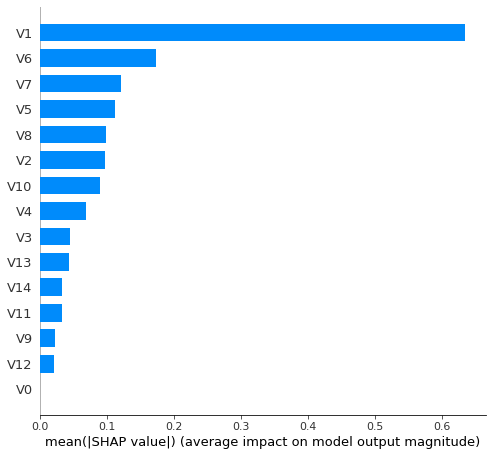

In [26]:
shap.summary_plot(shap_values, features=X_final_CO, feature_names=X_final_CO.columns, plot_type='bar')

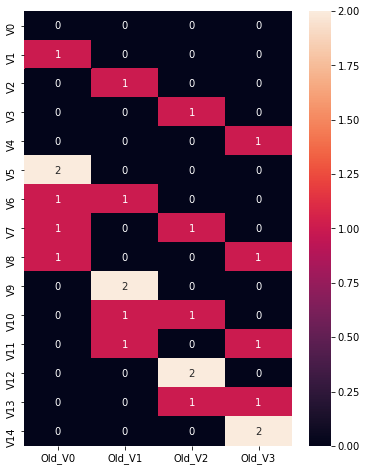

In [48]:
power_df = pd.DataFrame(poly.powers_,
                        index=[f'V{i}' for i in range(X_final_CO.shape[1])],
                        columns=['Old_V0','Old_V1','Old_V2','Old_V3'])
plt.figure(figsize=(6,8))
sns.heatmap(power_df,annot=True)
plt.show()

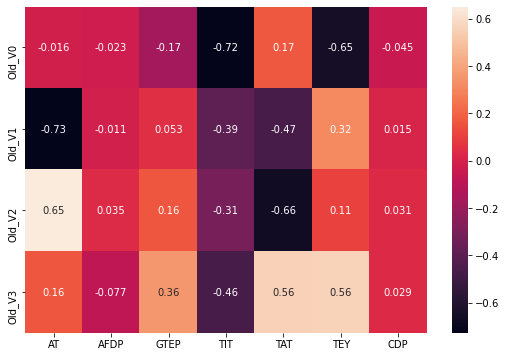

In [49]:
components = decomCO.components_
linear_df = pd.DataFrame(components,
                         columns=['AT',  'AFDP', 'GTEP',
                                  'TIT', 'TAT', 'TEY', 'CDP'],
                         index=['Old_V0','Old_V1','Old_V2','Old_V3'])

plt.figure(figsize=(9,6))
sns.heatmap(linear_df, annot=True)
plt.show()

## NOX PREDICTION

### Feature and Target Variable split data

In [27]:
X_train_NOX = X_train.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP' ,'TIT', 'TAT', 'TEY', 'CDP']].copy()
X_CV_NOX = X_CV.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP' ,'TIT', 'TAT', 'TEY', 'CDP']].copy()

y_train_NOX = y_train.loc[:,['NOX']].copy()
y_CV_NOX = y_CV.loc[:,['NOX']].copy()

### USING PCA TO REMOVE MULTICOLLINEARITY

[565.51330118 217.33890967  77.78480284  33.87563111  19.89696741
   2.55344842]
(22004, 6)


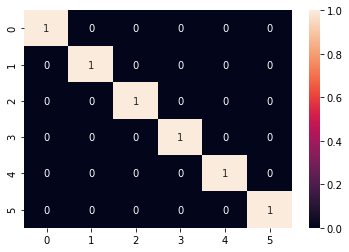

In [28]:
n = 6
decom = PCA(n_components=n,svd_solver='full')
decom.fit(X_train_NOX)
X_train_NOX_t = decom.transform(X_train_NOX)
X_train_NOX = pd.DataFrame(X_train_NOX_t, columns=[f'V{i}' for i in range(n)])
print(decom.explained_variance_)
sns.heatmap(np.corrcoef(X_train_NOX, rowvar=False)>0.1,annot=True)
print(X_train_NOX.shape)


X_CV_NOX_t = decom.transform(X_CV_NOX)
X_CV_NOX = pd.DataFrame(X_CV_NOX_t, columns=[f'V{i}' for i in range(n)])

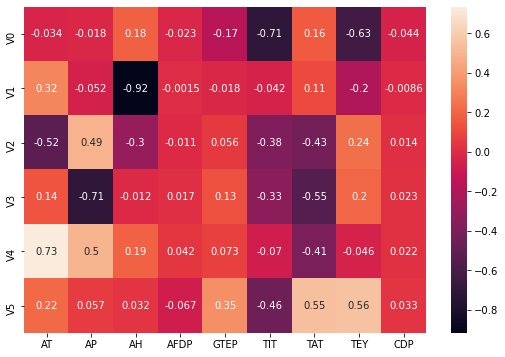

In [29]:
components = decom.components_
linear_df = pd.DataFrame(components,
                         columns=['AT', 'AP', 'AH', 'AFDP',
                                  'GTEP' ,'TIT', 'TAT', 
                                  'TEY', 'CDP'],
                         index=X_train_NOX.columns)

plt.figure(figsize=(9,6))
sns.heatmap(linear_df, annot=True)
plt.show()

### Linear Regression

In [30]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_NOX,y_train_NOX)

yhat = lr.predict(X_train_NOX)  # prediction on train data
yhat_CV = lr.predict(X_CV_NOX) # prediction on CV data

mse = mean_squared_error(yhat, y_train_NOX)  # MSE train
mse_CV = mean_squared_error(yhat_CV, y_CV_NOX)  # MSE CV

R_tr = r2_score(y_train_NOX,yhat)  # train R_square
R_CV = r2_score(y_CV_NOX, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(y_train_NOX)-1))/(len(y_train_NOX)-X_train_NOX.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(y_CV_NOX)-1))/(len(y_CV_NOX)-X_CV_NOX.shape[1]-1)  # CV A_djustedR_square

print("MSE train    : ",mse,"\tMSE CV      : ", mse_CV)
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)


lr.coef_

MSE train    :  65.28398730606378 	MSE CV      :  62.618937332544
R_square train:  0.5147071002342256 	R_square CV  :  0.5208137190563127
Adjusted_R_square train:  0.5145747295746541 	Adjusted_R_square CV  :  0.5204213722105618


array([[ 0.0880378 , -0.1725602 ,  0.48249082, -0.15210057, -0.86740994,
        -3.09926455]])

### Feature Engineering

Polynomial Feature transformation

In [31]:
# Polynomial features transformation
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(X_train_NOX)
X_train_NOX = poly.transform(X_train_NOX)
X_train_NOX = pd.DataFrame(data=X_train_NOX, columns=[f'V{i}' for i in range(X_train_NOX.shape[1])])

poly2 = PolynomialFeatures(degree=deg)
poly2.fit(X_CV_NOX)
X_CV_NOX = poly2.transform(X_CV_NOX)
X_CV_NOX = pd.DataFrame(data=X_CV_NOX, columns=[f'V{i}' for i in range(X_CV_NOX.shape[1])])

X_train_NOX.shape, X_CV_NOX.shape

((22004, 28), (7335, 28))

In [32]:
pd.DataFrame(poly.powers_, 
             index=[f'V{i}' for i in range(X_train_NOX.shape[1])],
             columns=['Old_V0','Old_V1','Old_V2','Old_V3','Old_V4','Old_V5'])

,Old_V0,Old_V1,Old_V2,Old_V3,Old_V4,Old_V5
V0,0,0,0,0,0,0
V1,1,0,0,0,0,0
V2,0,1,0,0,0,0
V3,0,0,1,0,0,0
V4,0,0,0,1,0,0
V5,0,0,0,0,1,0
V6,0,0,0,0,0,1
V7,2,0,0,0,0,0
V8,1,1,0,0,0,0
V9,1,0,1,0,0,0


In [33]:
scaler = StandardScaler()
scaler.fit(X_train_NOX)
X_train_NOX = scaler.transform(X_train_NOX)
X_train_NOX = pd.DataFrame(data = X_train_NOX, columns=[f'V{i}' for i in range(X_train_NOX.shape[1])])


X_CV_NOX = scaler.transform(X_CV_NOX)
X_CV_NOX = pd.DataFrame(data = X_CV_NOX, columns=[f'V{i}' for i in range(X_CV_NOX.shape[1])])
print(X_train_NOX.shape,X_CV_NOX.shape)

(22004, 28) (7335, 28)


### Linear Regression

In [34]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_NOX,y_train_NOX)

yhat = lr.predict(X_train_NOX)  # prediction on train data
yhat_CV = lr.predict(X_CV_NOX) # prediction on CV data

mse = mean_squared_error(yhat, y_train_NOX)  # MSE train
mse_CV = mean_squared_error(yhat_CV, y_CV_NOX)  # MSE CV

R_tr = r2_score(y_train_NOX,yhat)  # train R_square
R_CV = r2_score(y_CV_NOX, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(y_train_NOX)-1))/(len(y_train_NOX)-X_train_NOX.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(y_CV_NOX)-1))/(len(y_CV_NOX)-X_CV_NOX.shape[1]-1)  # CV A_djustedR_square

print("MSE train    : ",mse,"\tMSE CV      : ", mse_CV)
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)


lr.coef_

MSE train    :  35.107137045343855 	MSE CV      :  35.17171928624328
R_square train:  0.7390287413154545 	R_square CV  :  0.730851303501583
Adjusted_R_square train:  0.7386962182099633 	Adjusted_R_square CV  :  0.7298198001479071


array([[-3.49167822e-17, -1.00614553e+00, -4.52844880e+00,
         5.30884177e+00, -6.15972100e-01, -3.42084994e+00,
        -6.38091665e+00, -2.11884451e-01, -1.99986223e+00,
         5.33578946e+00,  1.31342292e+00, -6.56537505e-02,
        -4.11782622e-01,  5.83693088e-01, -2.30224789e-01,
        -3.35076773e-01, -3.20797471e-01,  3.84557777e-01,
         1.62392359e-01,  2.33419926e-01,  2.43267473e-01,
         3.99199736e-01, -1.58742344e-01, -6.72064757e-01,
         3.90188161e-01, -6.12205509e-02,  1.84920267e-01,
         2.08968856e+00]])

### Ridge Regression

In [92]:
# Ridge Regression
mse_tr_list = []
mse_CV_list = []

R_tr_list = []
R_CV_list = []
A_R_tr_list = []
A_R_CV_list = []

for alpha in range(0,300):
    lr = Ridge(alpha=alpha, fit_intercept=True,max_iter=None, solver='auto')
    lr.fit(X_train_NOX,y_train_NOX)

    yhat = lr.predict(X_train_NOX)  # prediction on train data
    yhat_CV = lr.predict(X_CV_NOX) # prediction on CV data

    mse = mean_squared_error(yhat, y_train_NOX)  # MSE train
    mse_tr_list.append(mse)

    mse_CV = mean_squared_error(yhat_CV, y_CV_NOX)  # MSE CV
    mse_CV_list.append(mse_CV)


    R_tr = lr.score(X_train_NOX,y_train_NOX)  # train R_square
    R_tr_list.append(R_tr)

    R_CV = lr.score(X_CV_NOX,y_CV_NOX)  # CV R_square
    R_CV_list.append(R_CV)

    # Adjusted R_squared

    A_R_tr = 1- ((1-R_tr)*(len(y_train_NOX)-1))/(len(y_train_NOX)-X_train_NOX.shape[1]-1)  # train Adjusted_R_square
    A_R_CV = 1- ((1-R_CV)*(len(y_CV_NOX)-1))/(len(y_CV_NOX)-X_train_NOX.shape[1]-1)  # CV A_djustedR_square
    A_R_tr_list.append(A_R_tr)
    A_R_CV_list.append(A_R_CV)


print("MSE_tr",mse_tr_list.index(min(mse_tr_list)), min(mse_tr_list))
print("MSE_CV",mse_CV_list.index(min(mse_CV_list)), min(mse_CV_list))
print("R_train",R_tr_list.index(max(R_tr_list)), max(R_tr_list))
print("R_CV",R_CV_list.index(max(R_CV_list)), max(R_CV_list))
print("Adjusted R_train",A_R_tr_list.index(max(A_R_tr_list)), max(A_R_tr_list))
print("Adjusted_R_CV",A_R_CV_list.index(max(A_R_CV_list)), max(A_R_CV_list))


MSE_tr 0 35.107138095877495
MSE_CV 160 35.14278955936215
R_train 0 0.7390287335062422
R_CV 160 0.731072685863268
Adjusted R_train 0 0.7386962103908008
Adjusted_R_CV 160 0.7300420309500695


### Decision Tree

In [61]:
mse_tr_list = []
mse_cv_list = []
# Decision Tree regression model
for depth in range(1,20):
    dtr = DecisionTreeRegressor(max_depth=depth, criterion='mse', random_state=1268)
    dtr.fit(X_train_NOX,y_train_NOX)

    mse = mean_squared_error(y_train_NOX,dtr.predict(X_train_NOX))
    mse_tr_list.append(mse)
    mse_CV = mean_squared_error(y_CV_NOX,dtr.predict(X_CV_NOX))
    mse_cv_list.append(mse_CV)

    print("Depth: ",depth,"MSE train    : ",mse,"\tMSE CV      : ", mse_CV)

Depth:  1 MSE train    :  111.95634467943496 	MSE CV      :  109.68505226735194
Depth:  2 MSE train    :  88.11233334214026 	MSE CV      :  87.92182141700378
Depth:  3 MSE train    :  67.74455009828344 	MSE CV      :  68.3902493371433
Depth:  4 MSE train    :  56.64136315568077 	MSE CV      :  56.334712541532845
Depth:  5 MSE train    :  47.39657996654873 	MSE CV      :  47.6796455374532
Depth:  6 MSE train    :  40.58404805182216 	MSE CV      :  43.13244576642657
Depth:  7 MSE train    :  35.0494833349007 	MSE CV      :  39.69237277581308
Depth:  8 MSE train    :  30.236174494419174 	MSE CV      :  37.807058817223414
Depth:  9 MSE train    :  25.85044003026865 	MSE CV      :  35.43664310837965
Depth:  10 MSE train    :  21.731455593802753 	MSE CV      :  33.80705420853837
Depth:  11 MSE train    :  18.185777630604548 	MSE CV      :  33.1607757732714
Depth:  12 MSE train    :  15.3221902015678 	MSE CV      :  33.687463353510644
Depth:  13 MSE train    :  12.756680915166351 	MSE CV     

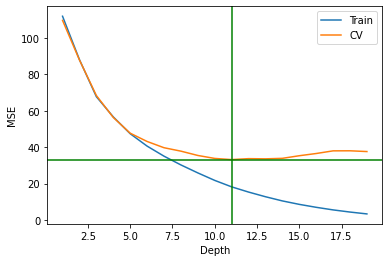

In [62]:
x_axis = list(range(1,20))
plt.plot(x_axis,mse_tr_list)
plt.plot(x_axis,mse_cv_list)
xh = mse_cv_list.index(min(mse_cv_list))
plt.axvline(x=xh+1, color='g')
plt.axhline(y=mse_cv_list[xh], color='g')
plt.xlabel("Depth")
plt.ylabel('MSE')
plt.legend(['Train','CV'])
plt.show()

### Random Forest Regressor

In [63]:
# Random forest
mse_tr_list = []
mse_cv_list = []
for f in range(1,28):
    rfReg = RandomForestRegressor(max_depth=11, n_estimators=100, n_jobs=-1, 
                                  criterion='mse', warm_start=True, 
                                  oob_score=True, bootstrap=True,
                                  max_features=f, random_state=1268)
    
    rfReg.fit(X_train_NOX,y_train_NOX.loc[:,'NOX'])

    yhat_tr = rfReg.predict(X_train_NOX)
    yhat_cv = rfReg.predict(X_CV_NOX)

    mse = mean_squared_error(y_train_NOX,yhat_tr)
    mse_tr_list.append(mse)

    mse_CV = mean_squared_error(y_CV_NOX,yhat_cv)
    mse_cv_list.append(mse_CV)

    print("max feature: ",f,"MSE train    : ",mse,"\tMSE CV      : ", mse_CV)


max feature:  1 MSE train    :  29.090241619536272 	MSE CV      :  36.06979300748632
max feature:  2 MSE train    :  21.399416865713217 	MSE CV      :  28.354828698861706
max feature:  3 MSE train    :  18.453388714906357 	MSE CV      :  25.818090606739585
max feature:  4 MSE train    :  17.056094082704163 	MSE CV      :  24.381982695310914
max feature:  5 MSE train    :  16.39562110270557 	MSE CV      :  23.801569037349672
max feature:  6 MSE train    :  15.861935123627196 	MSE CV      :  23.57906736468379
max feature:  7 MSE train    :  15.165088402618707 	MSE CV      :  23.092267838352885
max feature:  8 MSE train    :  15.20784869771433 	MSE CV      :  23.12117467330928
max feature:  9 MSE train    :  15.038250183637015 	MSE CV      :  22.829536995309546
max feature:  10 MSE train    :  14.9932041320036 	MSE CV      :  23.011930847378057
max feature:  11 MSE train    :  14.691903720699015 	MSE CV      :  22.703321016221167
max feature:  12 MSE train    :  14.779476069852894 	MSE CV

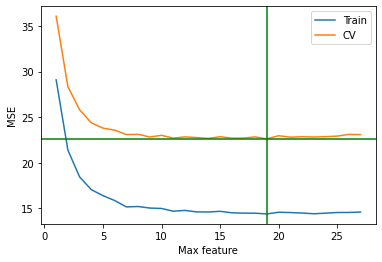

In [64]:
x_axis = list(range(1,28))
plt.plot(x_axis,mse_tr_list)
plt.plot(x_axis,mse_cv_list)
xh = mse_cv_list.index(min(mse_cv_list))
plt.axvline(x=xh+1, color='g')
plt.axhline(y=mse_cv_list[xh], color='g')
plt.xlabel("Max feature")
plt.ylabel('MSE')
plt.legend(['Train','CV'])
plt.show()

In [65]:
meanPred = ((y_CV_NOX - y_CV_NOX.mean())**2).sum()
meanPred

NOX    958520.566218
dtype: float64

### HYPERPARAMETER OPTIMIZATION

In [93]:
X_tr_cv_NOX = pd.concat([X_train_NOX,X_CV_NOX])
X_tr_cv_NOX.reset_index(drop=True,inplace=True)

y_tr_cv_NOX = pd.concat([y_train_NOX,y_CV_NOX])
y_tr_cv_NOX.reset_index(drop=True,inplace=True)

X_tr_cv_NOX.shape, y_tr_cv_NOX.shape

((29339, 28), (29339, 1))

In [94]:
def hyperopt_obj_function(model, params):
    mod = model(**params)
    out = cross_val_score(mod, X_tr_cv_NOX,y_tr_cv_NOX.loc[:,'NOX'], 
                          cv=4, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    return out

In [95]:
def surrogate_function(arg):
    params = arg['rparams']
    model = arg['model']
    perf = hyperopt_obj_function(model,params)
    return {'loss':-perf, 'status':STATUS_OK}

In [69]:
rparams = {"max_depth":scope.int(hp.quniform('max_depth', 10,35,1)),
           "n_estimators":scope.int(hp.quniform('n_estimators', 80,200,1)), 
           'max_features':scope.int(hp.quniform('max_features', 3,28,1)),
           'criterion':hp.choice('criterion',['mse','friedman_mse']), 
           "warm_start":hp.choice('warm_start',["True"]),
           "oob_score":hp.choice("oob_score",["True"]), 
           "bootstrap":hp.choice("bootstrap",["True"]),
           'n_jobs':-1}

In [70]:
trials = Trials()
best = fmin(surrogate_function, space={'model':RandomForestRegressor,
                                       'rparams':rparams},algo=tpe.suggest,
            max_evals=300, trials=trials)
print('best:')
print (best)

100%|█████████████████████████████████████████████| 300/300 [6:12:46<00:00, 74.56s/trial, best loss: 19.58057522525639]
best:
{'bootstrap': 0, 'criterion': 0, 'max_depth': 23.0, 'max_features': 11.0, 'n_estimators': 187.0, 'oob_score': 0, 'warm_start': 0}


In [96]:
rfReg = RandomForestRegressor(max_depth=23, n_estimators=187, n_jobs=-1, 
                                  criterion='mse', warm_start=True, 
                                  oob_score=True, bootstrap=True,
                                  max_features=11, random_state=4578)


rfReg.fit(X_tr_cv_NOX,y_tr_cv_NOX.loc[:,'NOX'])

yhat_tr = rfReg.predict(X_tr_cv_NOX)

mse = mean_squared_error(y_tr_cv_NOX,yhat_tr)
mse

2.981463477252172

In [73]:
dparams = {"max_depth":scope.int(hp.quniform('max_depth', 5,30,1)),
           'criterion':hp.choice('criterion',['mse','friedman_mse']), 
           }

In [75]:
trials = Trials()
best = fmin(surrogate_function, space={'model':DecisionTreeRegressor,
                                       'rparams':dparams},
            algo=tpe.suggest, max_evals=300, trials=trials)
print('best:')
print (best)

100%|███████████████████████████████████████████████| 300/300 [09:39<00:00,  1.93s/trial, best loss: 32.99951553579479]
best:
{'criterion': 0, 'max_depth': 11.0}


### WE GOT MINIMUM MSE WITH RANDOM FOREST

In [97]:
X_test_NOX = X_test.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP' ,'TIT', 'TAT', 'TEY', 'CDP']].copy()
y_test_NOX = y_test.loc[:,['NOX']].copy()


X_test_NOX_t = decom.transform(X_test_NOX)
X_test_NOX = pd.DataFrame(X_test_NOX_t, columns=[f'V{i}' for i in range(X_test_NOX_t.shape[1])])



deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(X_test_NOX)
X_test_NOX = poly.transform(X_test_NOX)
X_test_NOX = pd.DataFrame(data=X_test_NOX, columns=[f'V{i}' for i in range(X_test_NOX.shape[1])])



X_test_NOX = scaler.transform(X_test_NOX)
X_test_NOX = pd.DataFrame(data = X_test_NOX, columns=[f'V{i}' for i in range(X_test_NOX.shape[1])])

In [102]:
dtr = DecisionTreeRegressor(max_depth=11, criterion='mse',random_state=1268)
dtr.fit(X_tr_cv_NOX,y_tr_cv_NOX.loc[:,'NOX'])

yhat_tr = dtr.predict(X_tr_cv_NOX)
yhat_test = dtr.predict(X_test_NOX)

mse = mean_squared_error(y_tr_cv_NOX,yhat_tr)
print(mse)

mse_test = mean_squared_error(y_test_NOX,yhat_test)
print(mse_test)

18.706393801910618
34.19413475982693


In [103]:
rfReg = RandomForestRegressor(max_depth=23, n_estimators=187, n_jobs=-1, 
                                  criterion='mse', warm_start=True, 
                                  oob_score=True, bootstrap=True,
                                  max_features=11, random_state=4578)


rfReg.fit(X_tr_cv_NOX,y_tr_cv_NOX.iloc[:,0])

yhat_tr = rfReg.predict(X_tr_cv_NOX)
yhat_test = rfReg.predict(X_test_NOX)

mse = mean_squared_error(y_tr_cv_NOX,yhat_tr)
print(mse)

mse_test = mean_squared_error(y_test_NOX,yhat_test)
print(mse_test)

2.981463477252172
19.04043862344812


In [104]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_tr_cv_NOX,y_tr_cv_NOX.iloc[:,0])

yhat_tr = lr.predict(X_tr_cv_NOX)
yhat_test = lr.predict(X_test_NOX)

mse = mean_squared_error(y_tr_cv_NOX,yhat_tr)
print(mse)

mse_test = mean_squared_error(y_test_NOX,yhat_test)
print(mse_test)


R_tr = r2_score(y_tr_cv_NOX,yhat_tr)  # train R_square
R_test = r2_score(y_test_NOX, yhat_test)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(y_tr_cv_NOX)-1))/(len(y_tr_cv_NOX)-X_tr_cv_NOX.shape[1]-1)  # train Adjusted_R_square
A_R_test = 1- ((1-R_CV)*(len(y_test_NOX)-1))/(len(y_test_NOX)-X_test_NOX.shape[1]-1)  # CV A_djustedR_square

print("R_square train: ",R_tr,        "\tR_square CV  : ",R_test)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_test)


lr.coef_

35.10261872090191
38.34949538345764
R_square train:  0.7372144356291657 	R_square CV  :  0.7286352745326785
Adjusted_R_square train:  0.7369633951719026 	Adjusted_R_square CV  :  0.7299098560759116


array([-3.18391177e-17, -9.69526955e-01, -4.50367164e+00,  5.22989387e+00,
       -6.86990148e-01, -3.41266293e+00, -6.36670649e+00, -1.80553345e-01,
       -1.93533236e+00,  5.28132507e+00,  1.25702046e+00, -8.83081768e-02,
       -3.95717693e-01,  5.88729904e-01, -2.32778605e-01, -3.23424697e-01,
       -3.00064231e-01,  3.93637129e-01,  1.44144414e-01,  2.29184981e-01,
        2.45259260e-01,  4.31492281e-01, -1.18367153e-01, -6.61708028e-01,
        4.16667756e-01, -3.28846995e-02,  2.26807786e-01,  2.12511257e+00])

### Final Training of Random Forest Regressor over all the data

[566.22676003 217.03991262  78.34932136  34.05183068  19.80451933
   2.54457268]
(36674, 6)
(36674, 28)


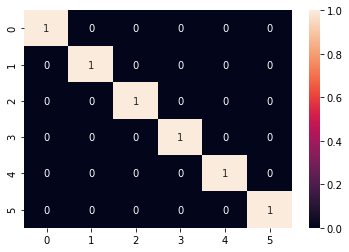

In [54]:
#_______________________________________________________________________________
X_final_NOX = X.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP' ,'TIT', 'TAT', 'TEY', 'CDP']].copy()
X_final_NOX.reset_index(drop=True,inplace=True)

y_final_NOX = y.loc[:,['NOX']].copy()
y_final_NOX.reset_index(drop=True,inplace=True)

#____REMOVING MULTICOLLINEARITY_________
n = 6
decomNOX = PCA(n_components=n,svd_solver='full')
decomNOX.fit(X_final_NOX)
X_final_NOX_t = decomNOX.transform(X_final_NOX)
X_final_NOX = pd.DataFrame(X_final_NOX_t, columns=[f'V{i}' for i in range(X_final_NOX_t.shape[1])])
print(decomNOX.explained_variance_)
sns.heatmap(np.corrcoef(X_final_NOX, rowvar=False)>0.1,annot=True)
print(X_final_NOX.shape)

#__________FEATURING ENGNEERING___________

# Polynomial features transformation
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(X_final_NOX)
X_final_NOX = poly.transform(X_final_NOX)
X_final_NOX = pd.DataFrame(data=X_final_NOX, columns=[f'V{i}' for i in range(X_final_NOX.shape[1])])
X_final_NOX.shape


#___________SCALING_______________________
scalerNOX = StandardScaler()
scalerNOX.fit(X_final_NOX)
X_final_NOX = scalerNOX.transform(X_final_NOX)
X_final_NOX = pd.DataFrame(data = X_final_NOX, columns=[f'V{i}' for i in range(X_final_NOX.shape[1])])
print(X_final_NOX.shape)

In [55]:
rfRegNOX = RandomForestRegressor(max_depth=23, n_estimators=187, n_jobs=-1, 
                                  criterion='mse', warm_start=True, 
                                  oob_score=True, bootstrap=True,
                                  max_features=11, random_state=4578)


rfRegNOX.fit(X_final_NOX,y_final_NOX.iloc[:,0])

yhat_f = rfRegNOX.predict(X_final_NOX)

mse_f = mean_squared_error(y_final_NOX,yhat_f)
print(mse_f)

3.009537757901404


### Feature Importance

In [38]:
explainerNOX = shap.TreeExplainer(rfRegNOX)
shap_valuesNOX = explainerNOX.shap_values(X_final_NOX.iloc[:100,:])

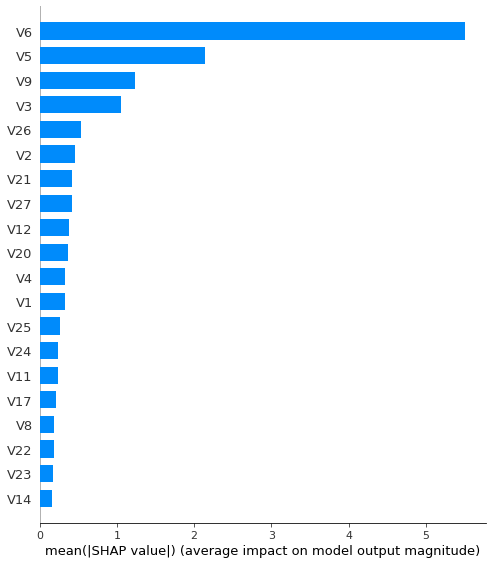

In [40]:
shap.summary_plot(shap_valuesNOX, features=X_final_NOX, feature_names=X_final_NOX.columns, plot_type='bar')

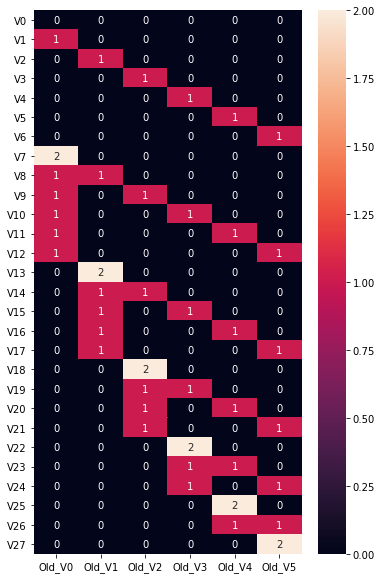

In [45]:
power_df = pd.DataFrame(poly.powers_,
                        index=[f'V{i}' for i in range(X_final_NOX.shape[1])],
                        columns=['Old_V0','Old_V1','Old_V2','Old_V3',
                                 'Old_V4','Old_V5'])
plt.figure(figsize=(6,10))
sns.heatmap(power_df,annot=True)
plt.show()

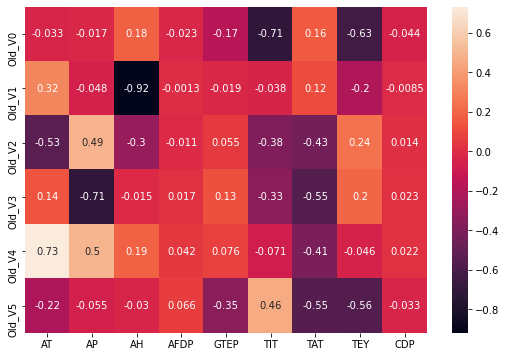

In [42]:
components = decomNOX.components_
linear_df = pd.DataFrame(components,
                         columns=['AT', 'AP', 'AH', 'AFDP',
                                  'GTEP' ,'TIT', 'TAT', 
                                  'TEY', 'CDP'],
                         index=['Old_V0','Old_V1','Old_V2','Old_V3','Old_V4','Old_V5'])

plt.figure(figsize=(9,6))
sns.heatmap(linear_df, annot=True)
plt.show()

# WEB APP

In [112]:
!pip install --quiet gradio

In [56]:
import pickle
import gradio

In [57]:
# Saving Models which have best R_squared
pickle.dump(rfRegCO,open('rfRegCO-model.pkl','wb'))
pickle.dump(rfRegNOX,open('rfRegNOX-model.pkl','wb'))

In [58]:
# Loading the saved model
rfRegCO_model = pickle.load(open('rfRegCO-model.pkl','rb'))
rfRegr_NOX_model = pickle.load(open('rfRegNOX-model.pkl','rb'))

In [59]:
# Function to predict CO emmision

def CO_pred(AT, AFDP, GTEP, TIT, TAT, TEY, CDP):

    x_in = np.array([AT, AFDP, GTEP, TIT, TAT, TEY, CDP]).reshape(1,-1)
    x_in = decomCO.transform(x_in)

    poly_CO = PolynomialFeatures(degree=2)
    poly_CO.fit(x_in)
    x_in = poly_CO.transform(x_in)

    x_in = scalerCO.transform(x_in)

    pred = rfRegCO_model.predict(x_in)

    return {"CO emmision in mg/m^3 :":pred[0]}

In [60]:
# Function to predict NOX emmision

def NOX_pred(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP):

    x_in = np.array([AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP]).reshape(1,-1)
    x_in = decomNOX.transform(x_in)

    poly_NOX = PolynomialFeatures(degree=2)
    poly_NOX.fit(x_in)
    x_in = poly_NOX.transform(x_in)

    x_in = scalerNOX.transform(x_in)

    pred = rfRegr_NOX_model.predict(x_in)

    return {"NOX emmision in mg/m^3 :":pred[0]}

In [61]:
# AT, AFDP, GTEP, TIT, TAT, TEY, CDP
CO_pred(23.056,4.2547,30.505,1100.0,542.30, 150.94, 13.379)

{'CO emmision in mg/m^3 :': 1.4201935304471}

In [62]:
# AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP
NOX_pred(25.551,1010.5,81.232,4.4498,29.848,1099.6,545.38,146.08,13.117)

{'NOX emmision in mg/m^3 :': 54.8047495941011}

In [64]:
# AT, AFDP, GTEP, TIT, TAT, TEY, CDP

iface = gradio.Interface(CO_pred, [gradio.inputs.Number(default=None, label="Ambient temperature in Celcius"),
                                   gradio.inputs.Number(default=None, label="Air filter difference pressure in mbar"),
                                   gradio.inputs.Number(default=None, label="Gas turbine exhaust pressure in mbar"),
                                   gradio.inputs.Number(default=None, label="Turbine inlet temperature in Celcius"),
                                   gradio.inputs.Number(default=None, label="Turbine after temperature in Celcius"),
                                   gradio.inputs.Number(default=None, label="Turbine energy yield in MWH"),
                                   gradio.inputs.Number(default=None, label="Compressor discharge pressure in mbar")],
                                   "key_values", description = "WEB-APP to predict the CO emmision")
iface.launch(debug=False,share=True)

Running locally at: http://127.0.0.1:7861/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://43219.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://43219.gradio.app')

In [65]:
# AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP

iface = gradio.Interface(NOX_pred, [gradio.inputs.Number(default=None, label="Ambient temperature in Celcius"),
                                    gradio.inputs.Number(default=None, label="Ambient pressure in mbar"),
                                    gradio.inputs.Number(default=None, label="Ambient humidity in (%)"),
                                    gradio.inputs.Number(default=None, label="Air filter difference pressure in mbar"),
                                    gradio.inputs.Number(default=None, label="Gas turbine exhaust pressure in mbar"),
                                    gradio.inputs.Number(default=None, label="Turbine inlet temperature in Celcius"),
                                    gradio.inputs.Number(default=None, label="Turbine after temperature in Celcius"),
                                    gradio.inputs.Number(default=None, label="Turbine energy yield in MWH"),
                                    gradio.inputs.Number(default=None, label="Compressor discharge pressure in mbar")],
                                    "key_values", description = "WEB-APP to predict the NOX emmision")
iface.launch(debug=False,share=True)

Running locally at: http://127.0.0.1:7862/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://34544.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://34544.gradio.app')

In [123]:
df.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,23.056,1019.3,62.777,4.2547,30.505,1100.0,542.30,150.94,13.379,1.6653,49.305
1,25.551,1010.5,81.232,4.4498,29.848,1099.6,545.38,146.08,13.117,1.0618,55.238
2,18.250,1017.9,81.401,3.9130,21.331,1043.6,539.33,113.22,11.017,12.6590,71.888
3,19.743,1016.0,82.356,3.7566,24.196,1078.6,549.94,130.07,11.891,2.0195,52.263
4,26.957,1010.2,65.205,5.3760,30.726,1099.9,544.02,148.01,13.272,1.0975,55.536


# References & Citation

Heysem Kaya, PÄ±nar TÃ¼fekci and ErdinÃ§ Uzun. 'Predicting CO and NOx emissions from gas turbines: novel data and a benchmark PEMS', Turkish Journal of Electrical Engineering & Computer Sciences, vol. 27, 2019, pp. 4783-4796, [Web Link]. Weblink: [Web Link]

Data Source : https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set#